In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?" + "APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-joseph
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | sinnamary
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | najran
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | blackfoot
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | danilovka
Processing Record 17 of Set 1 | umm lajj
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | hobart
P

Processing Record 38 of Set 4 | kemijarvi
Processing Record 39 of Set 4 | new norfolk
Processing Record 40 of Set 4 | kimbe
Processing Record 41 of Set 4 | beringovskiy
Processing Record 42 of Set 4 | nova olimpia
Processing Record 43 of Set 4 | atar
Processing Record 44 of Set 4 | nouadhibou
Processing Record 45 of Set 4 | gravdal
Processing Record 46 of Set 4 | urengoy
Processing Record 47 of Set 4 | chihuahua
Processing Record 48 of Set 4 | cabo san lucas
Processing Record 49 of Set 4 | borodino
Processing Record 50 of Set 4 | chara
Processing Record 1 of Set 5 | yar-sale
Processing Record 2 of Set 5 | locri
Processing Record 3 of Set 5 | fuzhou
Processing Record 4 of Set 5 | otjiwarongo
Processing Record 5 of Set 5 | samarai
Processing Record 6 of Set 5 | chicama
Processing Record 7 of Set 5 | hobyo
Processing Record 8 of Set 5 | oktyabrskoye
Processing Record 9 of Set 5 | ryotsu
Processing Record 10 of Set 5 | hovd
Processing Record 11 of Set 5 | bouloupari
Processing Record 12 of

Processing Record 28 of Set 8 | byron bay
Processing Record 29 of Set 8 | sitka
Processing Record 30 of Set 8 | muroto
Processing Record 31 of Set 8 | padilla
Processing Record 32 of Set 8 | shakawe
Processing Record 33 of Set 8 | meulaboh
Processing Record 34 of Set 8 | sioni
Processing Record 35 of Set 8 | redcar
Processing Record 36 of Set 8 | lata
Processing Record 37 of Set 8 | giddalur
Processing Record 38 of Set 8 | tautira
Processing Record 39 of Set 8 | yulara
Processing Record 40 of Set 8 | luchegorsk
Processing Record 41 of Set 8 | achisay
City not found. Skipping...
Processing Record 42 of Set 8 | kaeo
Processing Record 43 of Set 8 | coahuayana
Processing Record 44 of Set 8 | bolshaya chernigovka
City not found. Skipping...
Processing Record 45 of Set 8 | sensuntepeque
Processing Record 46 of Set 8 | talaya
Processing Record 47 of Set 8 | kasulu
Processing Record 48 of Set 8 | abdanan
Processing Record 49 of Set 8 | los lunas
Processing Record 50 of Set 8 | bastrop
Processi

Processing Record 16 of Set 12 | san pedro
Processing Record 17 of Set 12 | mehamn
Processing Record 18 of Set 12 | bam
Processing Record 19 of Set 12 | novyy urengoy
Processing Record 20 of Set 12 | shchelyayur
City not found. Skipping...
Processing Record 21 of Set 12 | dianopolis
City not found. Skipping...
Processing Record 22 of Set 12 | necochea
Processing Record 23 of Set 12 | warqla
City not found. Skipping...
Processing Record 24 of Set 12 | yenagoa
Processing Record 25 of Set 12 | aksu
Processing Record 26 of Set 12 | khash
Processing Record 27 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 28 of Set 12 | viedma
Processing Record 29 of Set 12 | makinsk
Processing Record 30 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 31 of Set 12 | clevelandia
Processing Record 32 of Set 12 | ystad
Processing Record 33 of Set 12 | acarau
Processing Record 34 of Set 12 | gilgit
Processing Record 35 of Set 12 | liverpool
Processing Record 36 

In [14]:
len(city_data)

583

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Joseph,-21.3667,55.6167,301.15,74,0,2.06,RE,2021-03-26 14:28:09
1,Bluff,-46.6000,168.3333,288.15,83,100,3.51,NZ,2021-03-26 14:28:10
2,Georgetown,5.4112,100.3354,299.26,94,40,1.54,MY,2021-03-26 14:26:21
3,Kruisfontein,-34.0033,24.7314,298.71,58,27,2.24,ZA,2021-03-26 14:28:10
4,Ushuaia,-54.8000,-68.3000,283.15,46,40,2.57,AR,2021-03-26 14:25:31
5,Thompson,55.7435,-97.8558,265.15,93,90,2.06,CA,2021-03-26 14:28:10
6,Barrow,71.2906,-156.7887,250.15,70,1,2.06,US,2021-03-26 14:25:03
7,Sinnamary,5.3833,-52.9500,300.65,75,59,5.25,GF,2021-03-26 14:28:11
8,Bredasdorp,-34.5322,20.0403,302.15,26,1,10.80,ZA,2021-03-26 14:28:11
9,Qaanaaq,77.4840,-69.3632,248.37,58,100,3.91,GL,2021-03-26 14:28:12


In [16]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Joseph,RE,2021-03-26 14:28:09,-21.3667,55.6167,301.15,74,0,2.06
1,Bluff,NZ,2021-03-26 14:28:10,-46.6000,168.3333,288.15,83,100,3.51
2,Georgetown,MY,2021-03-26 14:26:21,5.4112,100.3354,299.26,94,40,1.54
3,Kruisfontein,ZA,2021-03-26 14:28:10,-34.0033,24.7314,298.71,58,27,2.24
4,Ushuaia,AR,2021-03-26 14:25:31,-54.8000,-68.3000,283.15,46,40,2.57
5,Thompson,CA,2021-03-26 14:28:10,55.7435,-97.8558,265.15,93,90,2.06
6,Barrow,US,2021-03-26 14:25:03,71.2906,-156.7887,250.15,70,1,2.06
7,Sinnamary,GF,2021-03-26 14:28:11,5.3833,-52.9500,300.65,75,59,5.25
8,Bredasdorp,ZA,2021-03-26 14:28:11,-34.5322,20.0403,302.15,26,1,10.80
9,Qaanaaq,GL,2021-03-26 14:28:12,77.4840,-69.3632,248.37,58,100,3.91


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

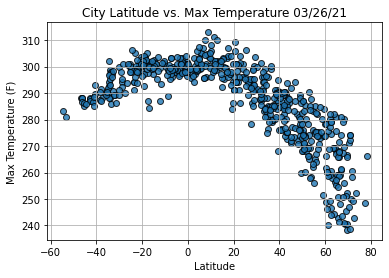

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

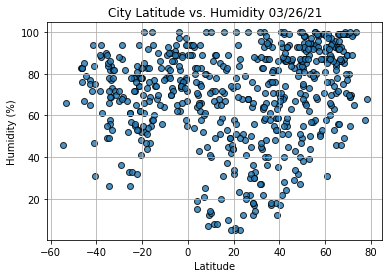

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

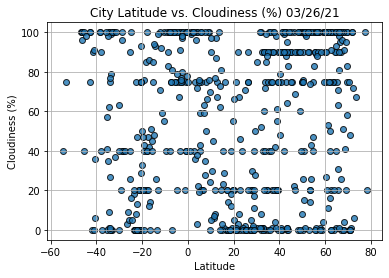

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


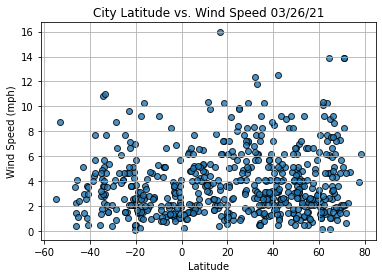

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()